In [11]:
import matplotlib.pyplot as plt
import json
import numpy as np
import seaborn as sns
import pandas as pd
import os

In [12]:
# Get the current notebook's directory
current_dir = os.path.dirname(os.path.abspath('__file__'))
# Go up one level to the project root if needed
project_root = os.path.dirname(current_dir)
# Define paths relative to those locations
res_dir = os.path.join(project_root, 'data_files', 'fig4b')

with open(os.path.join(res_dir, 'fig4b_1.json')) as f:
    confidence_intervals = json.load(f)

with open(os.path.join(res_dir, 'fig4b_2.json')) as f:
    means = json.load(f)

with open(os.path.join(res_dir, 'fig4b_3.json')) as f:
    sd_devs = json.load(f)

# Define models and expertise levels
models = ["gpt-4-1106-preview", "mixtral-8x7b-instruct"]
expertise_levels = ["ai_assistant", "med_assistant", "neurologist", "epi_expert"]

# Prepare data for plotting
#converting to dictionaries and fixed 'zero-shot' as the experiment is done on zero-shot prompt
mean_values = {model: [means[f"{model}_zero-shot_{expertise}"] for expertise in expertise_levels] for model in models}
ci_values = {
    model: [confidence_intervals[f"{model}_zero-shot_{expertise}"] for expertise in expertise_levels]
    for model in models
}
sd_values = {model: [sd_devs[f"{model}_zero-shot_{expertise}"] for expertise in expertise_levels] for model in models}



In [13]:
# Data setup
expertise_levels = ["AI Assistant", "Med Assistant", "Neuroscientist", "Epilepsy Expert"]

# Baseline for cumulative improvement (starting at AI Assistant level)
baseline_gpt4 = mean_values["gpt-4-1106-preview"][0]
baseline_mixtral = mean_values["mixtral-8x7b-instruct"][0]

# Calculating cumulative improvement relative to the AI Assistant level for each expertise level
cumulative_gpt4 = [score - baseline_gpt4 for score in mean_values["gpt-4-1106-preview"]]
cumulative_mixtral = [score - baseline_mixtral for score in mean_values["mixtral-8x7b-instruct"]]

cis_gpt4 = ci_values['gpt-4-1106-preview']
lower_bounds_gpt4 = [ci[0] for ci in cis_gpt4]
upper_bounds_gpt4 = [ci[1] for ci in cis_gpt4]
#get cummulative difference between lower_bounds values and upper_bounds values
lower_bounds_gpt4 = [lower_bounds_gpt4[i] - baseline_gpt4 for i in range(4)]
upper_bounds_gpt4 = [upper_bounds_gpt4[i] - baseline_gpt4 for i in range(4)]

cis_mixtral = ci_values['mixtral-8x7b-instruct']
lower_bounds_mixtral = [ci[0] for ci in cis_mixtral]
upper_bounds_mixtral = [ci[1] for ci in cis_mixtral]
#get cummulative difference between lower_bounds values and upper_bounds values
lower_bounds_mixtral = [lower_bounds_mixtral[i] - baseline_mixtral for i in range(4)]
upper_bounds_mixtral = [upper_bounds_mixtral[i] - baseline_mixtral for i in range(4)]


Duplicate key in file '.matplotlibrc', line 15 ('font.sans-serif      : Arial, sans-serif')


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, sans-serif
findfont: Generic family 'sans-serif' not found because none of 

-1.571702054916095 14.690991622393518
-2.55 9.55 -1.571702054916095 14.690991622393518


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, sans-serif
findfont: Generic family 'sans-serif' not found because none of 

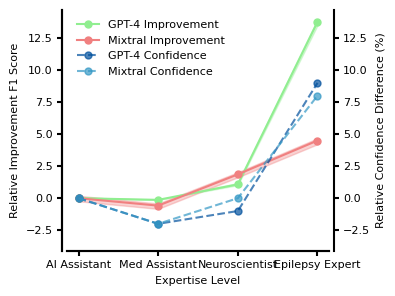

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

with mpl.rc_context(fname=".matplotlibrc"):
    # Data setup for Plot 1
    expertise_levels = ["AI Assistant", "Med Assistant", "Neuroscientist", "Epilepsy Expert"]
    mean_values = {
        "gpt-4-1106-preview": [38.38, 38.25, 39.46, 52.14],
        "mixtral-8x7b-instruct": [47.16, 46.58, 49.02, 51.66]
    }
    baseline_gpt4 = mean_values["gpt-4-1106-preview"][0]
    baseline_mixtral = mean_values["mixtral-8x7b-instruct"][0]
    cumulative_gpt4 = [score - baseline_gpt4 for score in mean_values["gpt-4-1106-preview"]]
    cumulative_mixtral = [score - baseline_mixtral for score in mean_values["mixtral-8x7b-instruct"]]

    # Confidence intervals for F1 scores #computed earlier
    lower_bounds_gpt4 = [ci[0] - baseline_gpt4 for ci in cis_gpt4]
    upper_bounds_gpt4 = [ci[1] - baseline_gpt4 for ci in cis_gpt4]
    lower_bounds_mixtral = [ci[0] - baseline_mixtral for ci in cis_mixtral]
    upper_bounds_mixtral = [ci[1] - baseline_mixtral for ci in cis_mixtral]


    # Data setup for Plot 2
    confidence_scores = {
        "mixtral": [0.38, 0.36, 0.38, 0.46],
        "gpt4": [0.33, 0.31, 0.32, 0.42]
    }
    confidence_scores = {model: [score * 100 for score in scores] for model, scores in confidence_scores.items()}
    baseline_mixtral_conf = confidence_scores["mixtral"][0]
    baseline_gpt4_conf = confidence_scores["gpt4"][0]
    cumulative_conf_mixtral = [(score - baseline_mixtral_conf) for score in confidence_scores["mixtral"]]
    cumulative_conf_gpt4 = [(score - baseline_gpt4_conf) for score in confidence_scores["gpt4"]]

    # Combined plot with dual y-axes
    fig, ax1 = plt.subplots(figsize=(4, 3))
    axes1 = plt.gca()
    #axes1.spines['top'].set_visible(False)
    x = np.arange(len(expertise_levels))
    # Plot 1: Relative Improvement in Performance
    color1 = 'tab:blue'
    ax1.set_xlabel("Expertise Level")
    ax1.set_ylabel("Relative Improvement F1 Score")
    line1, = ax1.plot(x, cumulative_gpt4, marker='o', linestyle='-', color='lightgreen', label="GPT-4 Improvement", markersize=5)
    line2, = ax1.plot(x, cumulative_mixtral, marker='o', linestyle='-', color='lightcoral', label="Mixtral Improvement", markersize=5)
    ax1.fill_between(x, lower_bounds_gpt4, upper_bounds_gpt4, color='lightgreen', alpha=0.35)
    ax1.fill_between(x, lower_bounds_mixtral, upper_bounds_mixtral, color='lightcoral', alpha=0.35)

    #get the limits of the y-axis for this plot
    ymin, ymax = ax1.get_ylim()
    print(ymin, ymax)
    #ax1.legend(loc="upper left") #removed to combine the legend with second plot

    # Secondary y-axis for Plot 2: Relative Confidence Difference
    ax2 = ax1.twinx()
    axes2 = plt.gca()
    offset = 3
    for spine in ['top', 'right', 'left']:
        ax1.spines[spine].set_position(('outward', offset))
        ax2.spines[spine].set_position(('outward', offset))

    # Hide the original spines
    ax1.spines['top'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(True)
    # axes2.spines['right'].set_position(('outward', 3))
    color2 = 'tab:gray'
    ax2.set_ylabel("Relative Confidence Difference (%)")
    line3, = ax2.plot(expertise_levels, cumulative_conf_gpt4, marker='o', linestyle='--', color='#00509d', alpha=0.7, label="GPT-4 Confidence", markersize=5)
    line4,= ax2.plot(expertise_levels, cumulative_conf_mixtral, marker='o', linestyle='--', color='#3398C5', alpha =0.7, label="Mixtral Confidence", markersize=5)
    #line4,= ax2.plot(expertise_levels, cumulative_conf_mixtral, marker='o', linestyle='--', color='#224870', alpha =0.7, label="Mixtral Confidence", markersize=5)
    #light blue: 39a9db
    ax2.tick_params(axis='y')
    #get the limits of the y-axis for this plot
    ymin2, ymax2 = ax2.get_ylim()
    print(ymin2, ymax2, ymin, ymax)
    #set the limits of the y-axis for this plot as the same as the first plot to have a consistent scale
    ax2.set_ylim(-4.1, ymax)
    ax1.set_ylim(-4.1, ymax)
    # Combine legends
    lines = [line1, line2, line3, line4]
    labels = [line.get_label() for line in lines]
    ax1.legend(lines, labels, loc="upper left")

    # Customize plot
    fig.tight_layout()
    #plt.title("Combined Plot: Performance and Confidence Across Expertise Levels")
    #plt.savefig('combined_expertise_plot_blue.svg', format='svg', dpi=300)
    plt.show()
